In [334]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [335]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings 
warnings.simplefilter("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn as skl
import imblearn as im
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [336]:
#Importing training data and test data

df_train = pd.read_csv('C:/Users/geet/OneDrive/Desktop/Python project FINAL/credit_train.csv')
df_test = pd.read_csv('C:/Users/geet/OneDrive/Desktop/Python project FINAL/credit_test.csv')

In [337]:
#Getting information about the training data
df_train.info()
df_train.isnull().sum()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

(100514, 19)

In [338]:
Summary = pd.DataFrame(df_train.describe())

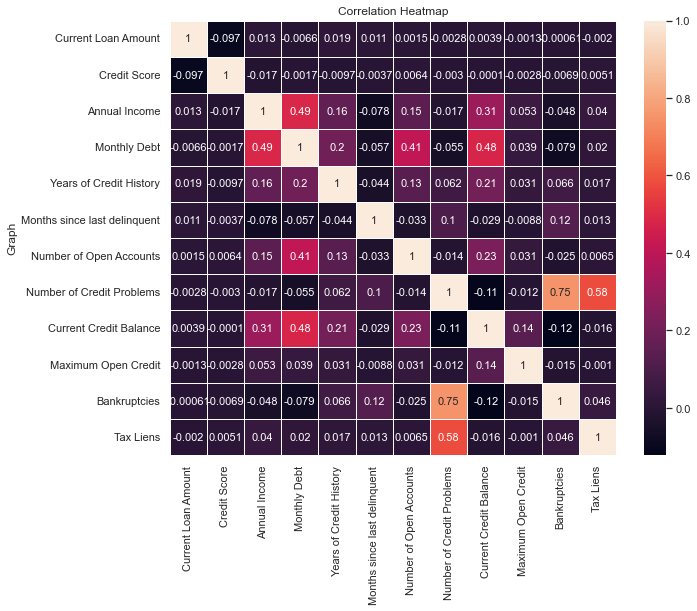

<Figure size 720x576 with 0 Axes>

In [341]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_train.corr(),annot=True, linewidths=1, annot_kws={"size":11})
plt.pyplot.title('Correlation Heatmap')
plt.pyplot.ylabel('Graph')
plt.pyplot.show()
plt.pyplot.savefig('Graph.png')

In [319]:
#Cleaning Data 

def DataCleaning(df):
        ##Filtering out outlier data for credit score using Boolean Mask
        mask = df['Credit Score'] <=850
        df = df[mask]

        ##Filtering out value of Current Loan Amount that is not equal to 99999999.0
        df = df[df['Current Loan Amount'] != 99999999.0]

        ##Filtering out outlier data for Years of Credit History using Boolean Mask

        df = df[df['Years of Credit History'] <=50]

        ##Filtering null values 
        #df['Bankruptcies'].dropna(inplace=True)
        #df['Years in current job'].dropna(inplace=True)

        ##Adding null values with zero
        df['Years in current job'].fillna(0,inplace=True)

        ##Removing redundant columns
        df.drop(columns=['Loan ID','Customer ID'],inplace=True)
        df.drop(columns='Months since last delinquent',inplace=True)

        ##Filtering out values of Years in current job that is not equal to 0
        df = df[df['Years in current job'] != 0]

        ##Adding null values of Bankruptcies column with 10 for subsequent filtering
        df['Bankruptcies'].fillna(10,inplace=True)

         ##Filtering out values of Bankruptcies that is not equal to 10
        df = df[df['Bankruptcies'] != 10]

        ##Encoding values of Term, Years in current job, Purpose, Home Ownership
        df['Term'].replace(to_replace=['Short Term', 'Long Term'], value=[1,0],inplace=True)
        df['Years in current job'].replace(to_replace=['8 years', '3 years', '< 1 year', '2 years', '10+ years',
       '4 years', '5 years', '1 year', '7 years', '6 years', '9 years'], value=[1,2,3,4,5,6,7,8,9,10,11],inplace=True)
        df['Home Ownership'].replace(to_replace=['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], value=[1,2,3,4],inplace=True)
        df['Purpose'].replace(to_replace=['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Take a Trip', 'Other', 'Business Loan', 'Buy a Car',
       'small_business', 'Medical Bills', 'vacation',
       'Educational Expenses', 'wedding', 'major_purchase', 'moving',
       'renewable_energy'], value=[1,2,3,4,5,4,6,7,8,9,10,11,12,13,14,15],inplace=True)

        ##Replacing column header names
        df.columns = df.columns.str.replace(' ', '_')
        return df


#####TRAINING DATA#####
##Encoding Loan Status Categorical variable with 0 and 1
df_train['Loan Status'] = df_train['Loan Status'].replace(to_replace=['Fully Paid','Charged Off'],value=[1,0])

df_train = DataCleaning(df_train)
df_train

####TEST DATA#####
df_test = DataCleaning(df_test)
df_test

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,611314.0,1,747.0,2074116.0,5,1,2,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,266662.0,1,734.0,1919190.0,5,1,2,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0
2,153494.0,1,709.0,871112.0,4,3,2,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0
3,176242.0,1,727.0,780083.0,5,3,2,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0
4,321992.0,1,744.0,1761148.0,5,1,2,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,428604.0,0,697.0,2183043.0,10,1,2,16882.07,22.1,10.0,0.0,385187.0,525316.0,0.0,0.0
9993,220858.0,1,737.0,1234088.0,3,3,2,20362.49,9.5,10.0,0.0,273353.0,409442.0,0.0,0.0
9994,442596.0,1,739.0,1528968.0,9,1,2,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0
9995,157806.0,1,731.0,1514376.0,10,3,2,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0


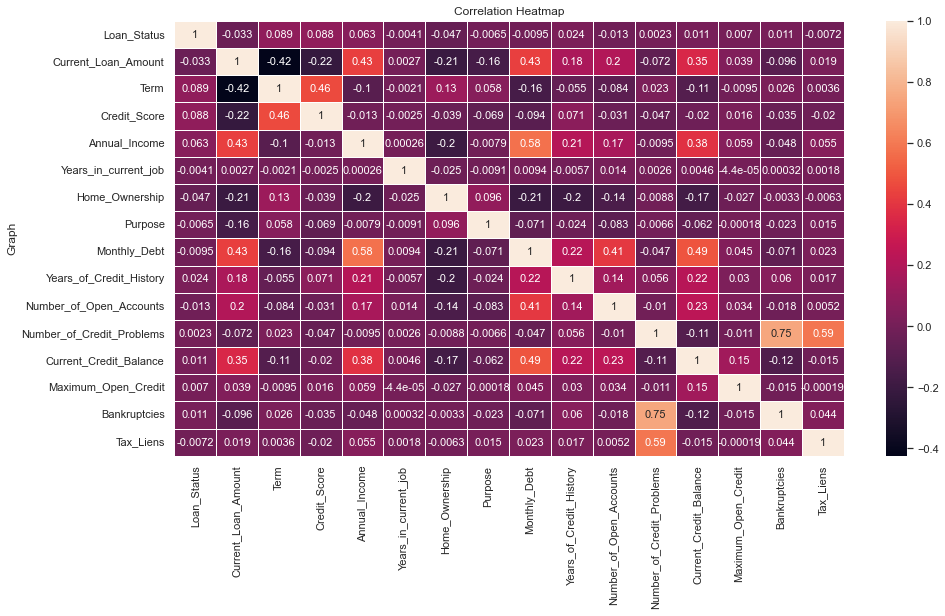

<Figure size 1080x576 with 0 Axes>

In [333]:
##Correlation Plot

sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df_train.corr(),annot=True, linewidths=1, annot_kws={"size":11})
plt.pyplot.title('Correlation Heatmap')
plt.pyplot.ylabel('Graph')
plt.pyplot.show()
plt.pyplot.savefig('Graph.png')

In [236]:
##Creating X and y variable where X is the independent variable and y is the dependent variable
X = df_train[['Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']]
y = df_train['Loan_Status']

In [237]:
#Creating object for LogisticRegression()
logreg = LogisticRegression()

#Using train_test_split to partition the data into train and test.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

(43337, 15)
(43337,)


In [238]:
##Model Fitting
logreg.fit(X_train,y_train)

LogisticRegression()

In [239]:
log_coeff = logreg.fit(X_train,y_train)

In [240]:
log_coeff.coef_

array([[-9.93248858e-07,  3.31177677e-06,  1.84708839e-03,
         5.36234474e-07,  1.30984374e-05,  5.39306663e-06,
         5.97580251e-06, -1.76814296e-05,  3.79471468e-05,
         1.91966874e-05,  4.89241981e-07,  1.45721209e-07,
         7.23777103e-09,  4.79025144e-07, -5.83433092e-08]])

In [241]:

# Loan_Status = -0.000000993248858 Current_Loan_Amount + 0.00000331177677 Term + 0.00184708839  Credit_Score 
#               +0.000000536234474 Annual_Income+ 0.0000130984374 Years_in_current_job + 0.00000539306663 Home_Ownership 
#               +0.00000597580251 Purpose - 0.0000176814296 Monthly_Debt + 0.0000379471468 Years_of_Credit_History 
#               +0.0000191966874 Number_of_Open_Accounts + 0.000000489241981 Number_of_Credit_Problems 
#               +0.000000145721209  Current_Credit_Balance + 0.00000000723777103 Maximum_Open_Credit 
#             +0.000000479025144 Bankruptcies - 0.0000000583433092 Tax_Liens
            

In [242]:
y_pred = logreg.predict(X_test)

In [243]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [244]:
X_test.shape

(18574, 15)

In [245]:
y_pred.shape

(18574,)

In [246]:
prob_accuracy_score = skl.metrics.accuracy_score(y_test,y_pred)
prob_accuracy_score

0.8103801012167546

In [247]:
y.value_counts()

1.0    49997
0.0    11914
Name: Loan_Status, dtype: int64

In [248]:
## Using RandomOverSampler we are trying to resolve over sampling by adding duplicate rows from minority class in the data.
over_sampling = im.over_sampling.RandomOverSampler(sampling_strategy=0.7)
X_over_sampling, y_over_sampling = over_sampling.fit_resample(X,y)

In [249]:
y_over_sampling.value_counts()

1.0    49997
0.0    34997
Name: Loan_Status, dtype: int64

In [250]:
print(X_over_sampling.shape)
print(y_over_sampling.shape)

(84994, 15)
(84994,)


In [251]:
logreg.fit(X_over_sampling,y_over_sampling)
y_pred_over = logreg.predict(X_test)

In [252]:
prob_accuracy_score_over = skl.metrics.accuracy_score(y_test,y_pred_over)
prob_accuracy_score_over

0.7807688166253903

In [253]:
df_test

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,611314.0,1,747.0,2074116.0,5,1,2,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,266662.0,1,734.0,1919190.0,5,1,2,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0
2,153494.0,1,709.0,871112.0,4,3,2,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0
3,176242.0,1,727.0,780083.0,5,3,2,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0
4,321992.0,1,744.0,1761148.0,5,1,2,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,428604.0,0,697.0,2183043.0,10,1,2,16882.07,22.1,10.0,0.0,385187.0,525316.0,0.0,0.0
9993,220858.0,1,737.0,1234088.0,3,3,2,20362.49,9.5,10.0,0.0,273353.0,409442.0,0.0,0.0
9994,442596.0,1,739.0,1528968.0,9,1,2,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0
9995,157806.0,1,731.0,1514376.0,10,3,2,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0


In [254]:
#Predict the loan status outcome on new dataset for recommendation


In [255]:
recom = logreg.predict(df_test)

In [256]:
recom

array([1., 1., 1., ..., 1., 1., 1.])

In [257]:
df_test.reset_index(drop=True, inplace = True)

In [258]:
df_prediction_recom = pd.DataFrame(recom)

In [259]:
df_Logistic_final=pd.concat([df_test, df_prediction_recom], axis=1)
df_Logistic_final

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,0
0,611314.0,1,747.0,2074116.0,5,1,2,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,1.0
1,266662.0,1,734.0,1919190.0,5,1,2,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,1.0
2,153494.0,1,709.0,871112.0,4,3,2,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,1.0
3,176242.0,1,727.0,780083.0,5,3,2,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,1.0
4,321992.0,1,744.0,1761148.0,5,1,2,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,428604.0,0,697.0,2183043.0,10,1,2,16882.07,22.1,10.0,0.0,385187.0,525316.0,0.0,0.0,1.0
6135,220858.0,1,737.0,1234088.0,3,3,2,20362.49,9.5,10.0,0.0,273353.0,409442.0,0.0,0.0,1.0
6136,442596.0,1,739.0,1528968.0,9,1,2,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0,1.0
6137,157806.0,1,731.0,1514376.0,10,3,2,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0,1.0


In [260]:
df_Logistic_final.rename(columns={0:'Loan Status Predicted'},inplace=True)
df_Logistic_final

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan Status Predicted
0,611314.0,1,747.0,2074116.0,5,1,2,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,1.0
1,266662.0,1,734.0,1919190.0,5,1,2,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,1.0
2,153494.0,1,709.0,871112.0,4,3,2,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,1.0
3,176242.0,1,727.0,780083.0,5,3,2,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,1.0
4,321992.0,1,744.0,1761148.0,5,1,2,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,428604.0,0,697.0,2183043.0,10,1,2,16882.07,22.1,10.0,0.0,385187.0,525316.0,0.0,0.0,1.0
6135,220858.0,1,737.0,1234088.0,3,3,2,20362.49,9.5,10.0,0.0,273353.0,409442.0,0.0,0.0,1.0
6136,442596.0,1,739.0,1528968.0,9,1,2,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0,1.0
6137,157806.0,1,731.0,1514376.0,10,3,2,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0,1.0


In [261]:
df_Logistic_final['Loan Status Predicted'].value_counts()

1.0    5708
0.0     431
Name: Loan Status Predicted, dtype: int64

In [262]:
#adding loan status name column for making piechart
df_Logistic_final['Loan_Status_Name'] = np.where(df_Logistic_final['Loan Status Predicted'] == 1, "Fully Paid", "Charged off")

In [263]:
#quality check
df_Logistic_final['Loan_Status_Name'].value_counts()

Fully Paid     5708
Charged off     431
Name: Loan_Status_Name, dtype: int64

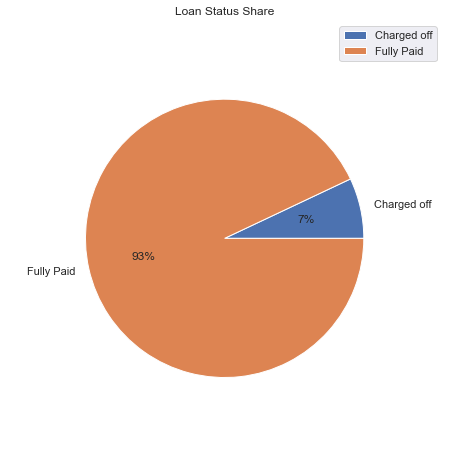

In [264]:
#pie chart 
df_Logistic_final.groupby('Loan_Status_Name').count().plot(kind='pie',y='Loan Status Predicted',autopct='%1.0f%%',
                                                           title='Loan Status Share',radius = 0.8)
plt.pyplot.ylabel("")
plt.pyplot.show()

# Decision Tree Algorithm

In [265]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dt.fit(X_over_sampling, y_over_sampling)

# making predictions

prediction = dt.predict(X_over_sampling)
print('Prediction {}'.format(prediction))

Prediction [1. 0. 1. ... 1. 1. 1.]


In [266]:
y_over_names = ['Fully Paid','Charged Off' ]
X_over_names = list(X_over_sampling.columns)

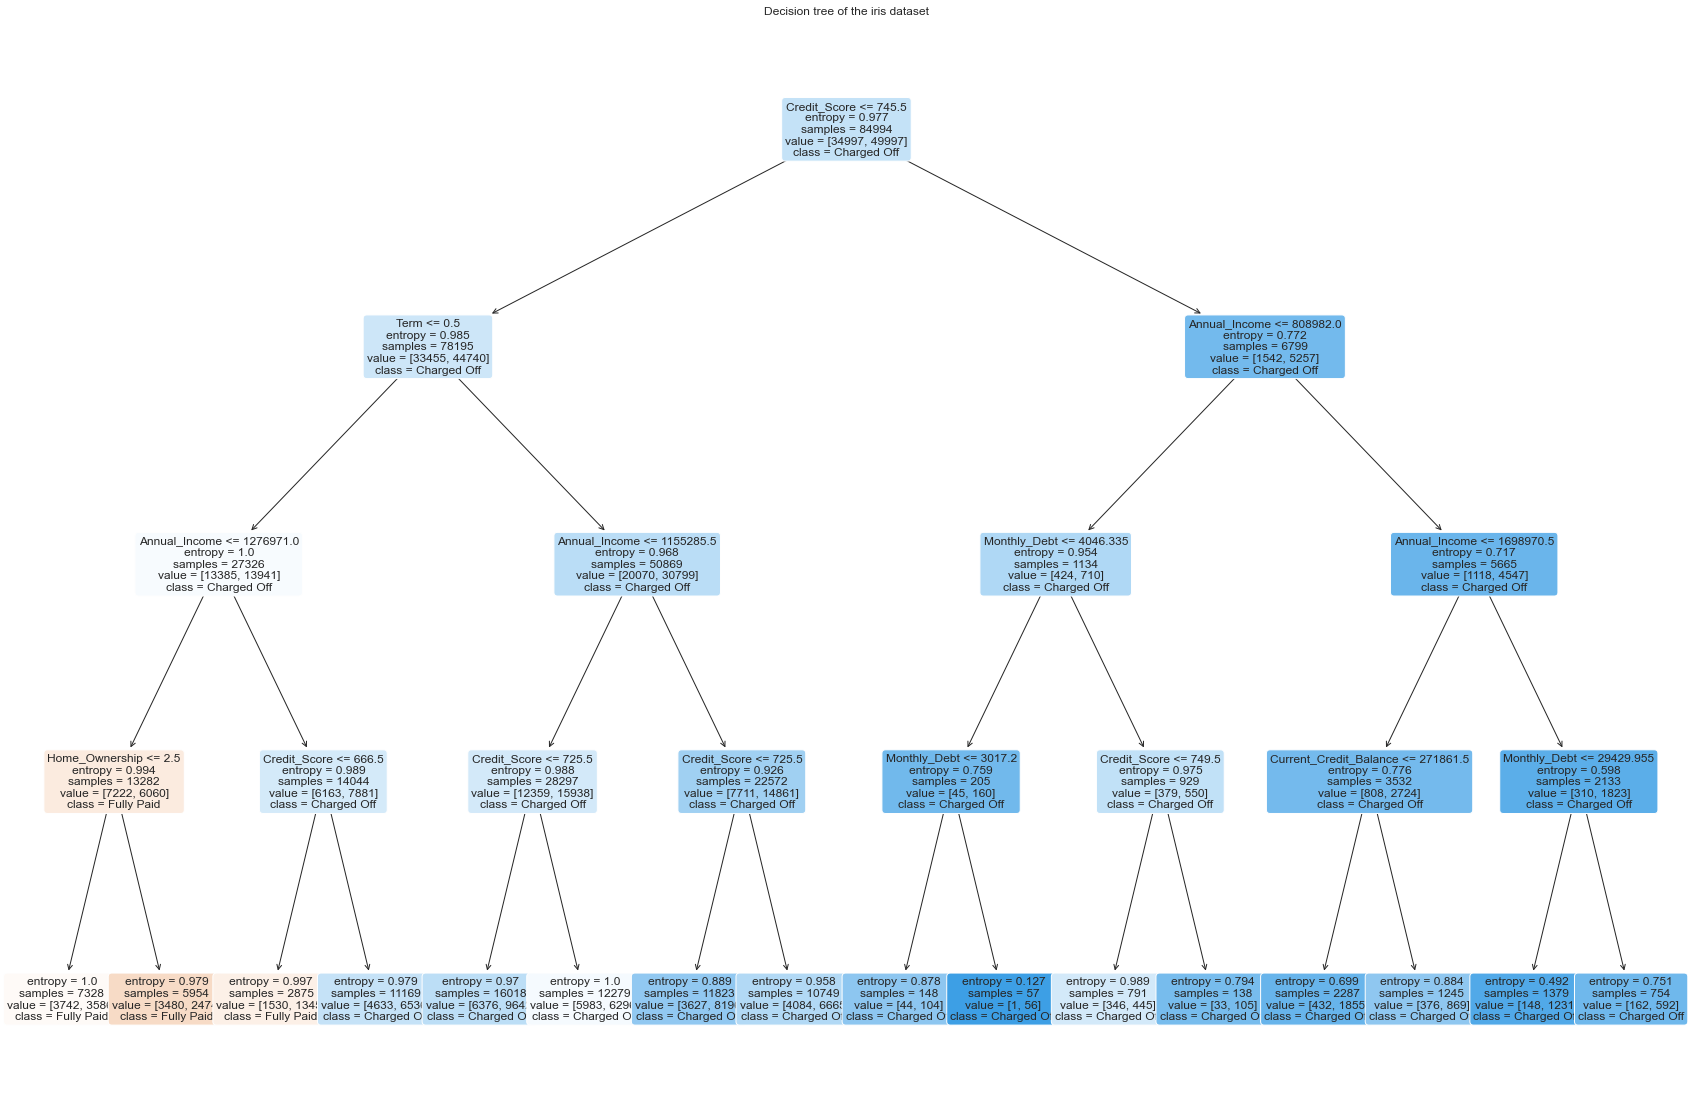

In [267]:

plt.pyplot.figure(figsize=(30, 20))
plot_tree(dt, filled=True, fontsize=12, feature_names=X_over_names, 
          rounded=True, class_names = y_over_names)
plt.pyplot.title("Decision tree of the iris dataset")
plt.pyplot.show()

In [268]:
from sklearn.model_selection import train_test_split

X_train_dec, X_test_dec, y_train_dec, y_test_dec =train_test_split(X_over_sampling, y_over_sampling, test_size=0.3,random_state=21, stratify=y_over_sampling)

In [269]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=20)
test = dt.fit(X_train_dec, y_train_dec)
y_pred = dt.predict(X_test_dec)
print("Test set predictions:\n {}".format(y_pred))
dt.score(X_test_dec, y_test_dec)

Test set predictions:
 [1. 0. 1. ... 1. 1. 0.]


0.7816777128514844

In [270]:
test.feature_importances_

array([0.11919296, 0.00751527, 0.09625431, 0.13544073, 0.05442364,
       0.01738424, 0.0250413 , 0.13396373, 0.10946008, 0.06316141,
       0.00889417, 0.10770158, 0.11336   , 0.0067768 , 0.00142979])

In [271]:
prediction_decision_tree = dt.predict(df_test)

In [272]:
prediction_decision_tree

array([1., 1., 1., ..., 1., 0., 1.])

In [273]:
type(df_test)

pandas.core.frame.DataFrame

In [274]:
df_test.reset_index(drop=True, inplace = True)

In [275]:
prediction_decision_tree.shape

(6139,)

In [276]:
df_test.shape

(6139, 15)

In [277]:
df_prediction_decision_tree = pd.DataFrame(prediction_decision_tree)

In [278]:
df_DecisionTree_Final=pd.concat([df_test, df_prediction_decision_tree], axis=1)
df_DecisionTree_Final

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,0
0,611314.0,1,747.0,2074116.0,5,1,2,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,1.0
1,266662.0,1,734.0,1919190.0,5,1,2,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,1.0
2,153494.0,1,709.0,871112.0,4,3,2,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,1.0
3,176242.0,1,727.0,780083.0,5,3,2,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,0.0
4,321992.0,1,744.0,1761148.0,5,1,2,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,428604.0,0,697.0,2183043.0,10,1,2,16882.07,22.1,10.0,0.0,385187.0,525316.0,0.0,0.0,1.0
6135,220858.0,1,737.0,1234088.0,3,3,2,20362.49,9.5,10.0,0.0,273353.0,409442.0,0.0,0.0,0.0
6136,442596.0,1,739.0,1528968.0,9,1,2,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0,1.0
6137,157806.0,1,731.0,1514376.0,10,3,2,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0,0.0


In [279]:
df_DecisionTree_Final.rename(columns={0:'Loan Status Predicted'},inplace=True)
df_DecisionTree_Final

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan Status Predicted
0,611314.0,1,747.0,2074116.0,5,1,2,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,1.0
1,266662.0,1,734.0,1919190.0,5,1,2,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,1.0
2,153494.0,1,709.0,871112.0,4,3,2,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,1.0
3,176242.0,1,727.0,780083.0,5,3,2,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,0.0
4,321992.0,1,744.0,1761148.0,5,1,2,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,428604.0,0,697.0,2183043.0,10,1,2,16882.07,22.1,10.0,0.0,385187.0,525316.0,0.0,0.0,1.0
6135,220858.0,1,737.0,1234088.0,3,3,2,20362.49,9.5,10.0,0.0,273353.0,409442.0,0.0,0.0,0.0
6136,442596.0,1,739.0,1528968.0,9,1,2,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0,1.0
6137,157806.0,1,731.0,1514376.0,10,3,2,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0,0.0


In [280]:
# Comparing cols
output_comparison = recom==prediction_decision_tree
output_comparison_Series= pd.Series(output_comparison)

In [281]:
output_comparison_Series.value_counts()

True     4602
False    1537
dtype: int64

In [282]:
#Percentage of matched output
output_comparison_Series.value_counts(normalize=True)

True     0.749633
False    0.250367
dtype: float64

In [283]:
df_Logistic_final

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan Status Predicted,Loan_Status_Name
0,611314.0,1,747.0,2074116.0,5,1,2,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,1.0,Fully Paid
1,266662.0,1,734.0,1919190.0,5,1,2,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,1.0,Fully Paid
2,153494.0,1,709.0,871112.0,4,3,2,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,1.0,Fully Paid
3,176242.0,1,727.0,780083.0,5,3,2,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,1.0,Fully Paid
4,321992.0,1,744.0,1761148.0,5,1,2,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,1.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,428604.0,0,697.0,2183043.0,10,1,2,16882.07,22.1,10.0,0.0,385187.0,525316.0,0.0,0.0,1.0,Fully Paid
6135,220858.0,1,737.0,1234088.0,3,3,2,20362.49,9.5,10.0,0.0,273353.0,409442.0,0.0,0.0,1.0,Fully Paid
6136,442596.0,1,739.0,1528968.0,9,1,2,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0,1.0,Fully Paid
6137,157806.0,1,731.0,1514376.0,10,3,2,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0,1.0,Fully Paid


In [284]:
 df_Logistic_final.describe()  

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan Status Predicted
count,6139.000000,6139.000000,6139.000000,6.139000e+03,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6.139000e+03,6.139000e+03,6139.000000,6139.000000,6139.000000
mean,314357.896074,0.706630,715.388988,1.400296e+06,5.424825,1.947386,2.471575,18890.317881,17.922251,11.151816,0.158495,2.947903e+05,6.552538e+05,0.113699,0.026226,0.929793
std,187150.000839,0.455344,28.310724,9.012255e+05,2.570164,0.955682,1.607543,12479.140438,6.649241,5.081360,0.481794,4.085362e+05,1.022878e+06,0.347368,0.258066,0.255516
min,21472.000000,0.000000,585.000000,8.109200e+04,1.000000,1.000000,1.000000,0.000000,4.100000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,171710.000000,0.000000,703.000000,8.673785e+05,4.000000,1.000000,2.000000,10470.330000,13.500000,8.000000,0.000000,1.107510e+05,2.698960e+05,0.000000,0.000000,1.000000
50%,268510.000000,1.000000,721.000000,1.208818e+06,5.000000,2.000000,2.000000,16470.150000,16.900000,10.000000,0.000000,2.106910e+05,4.588100e+05,0.000000,0.000000,1.000000
75%,435688.000000,1.000000,738.000000,1.689480e+06,7.000000,3.000000,2.000000,24493.850000,21.500000,14.000000,0.000000,3.654935e+05,7.776340e+05,0.000000,0.000000,1.000000
max,789030.000000,1.000000,751.000000,1.781535e+07,11.000000,4.000000,15.000000,143526.570000,50.000000,55.000000,10.000000,1.623744e+07,3.752742e+07,3.000000,9.000000,1.000000


In [285]:
df_charged_off = df_Logistic_final[df_Logistic_final['Loan Status Predicted'] == 0]

(array([123., 101.,  72.,  28.,  12.,   2.,   1.,   1.,   0.]),
 array([ 705033,  955033, 1205033, 1455033, 1705033, 1955033, 2205033,
        2455033, 2705033, 2955033]),
 <BarContainer object of 9 artists>)

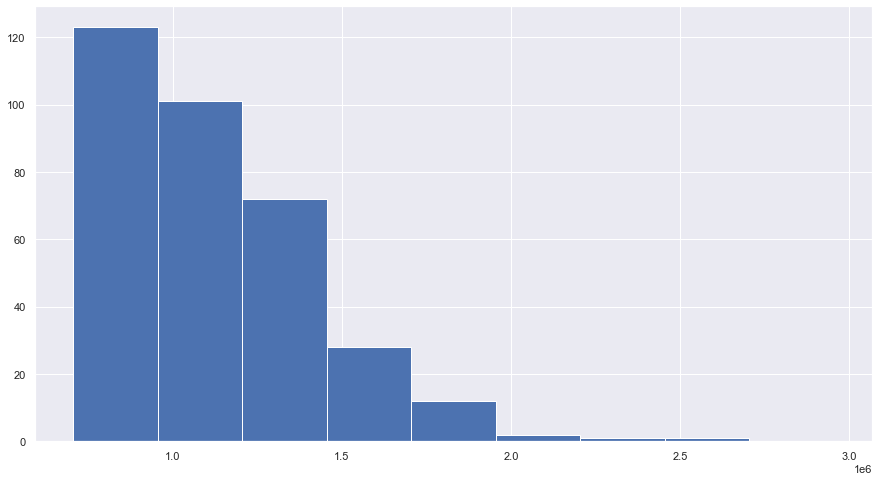

In [286]:
bins = [705033, 955033, 1205033, 1455033, 1705033, 1955033, 2205033, 2455033, 2705033, 2955033]
plt.pyplot.hist(df_charged_off["Annual_Income"], bins=bins)

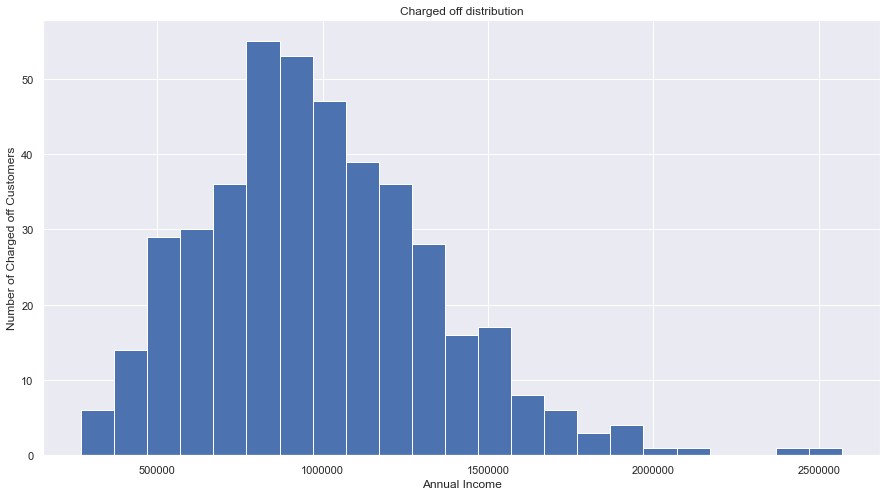

In [287]:
# df_charged_off["Annual_Income"].hist(bins=int)

# plt.hist(df_charged_off["Annual_Income"], bins=10)

w=100000

plt.pyplot.hist(df_charged_off["Annual_Income"], bins=np.arange(min(df_charged_off["Annual_Income"]), max(df_charged_off["Annual_Income"]) + w, w))
#plt.xticks(rotation =0)
plt.pyplot.ticklabel_format(style='plain')
plt.pyplot.title('Charged off distribution')
plt.pyplot.xlabel('Annual Income')
plt.pyplot.ylabel('Number of Charged off Customers')
plt.pyplot.show()


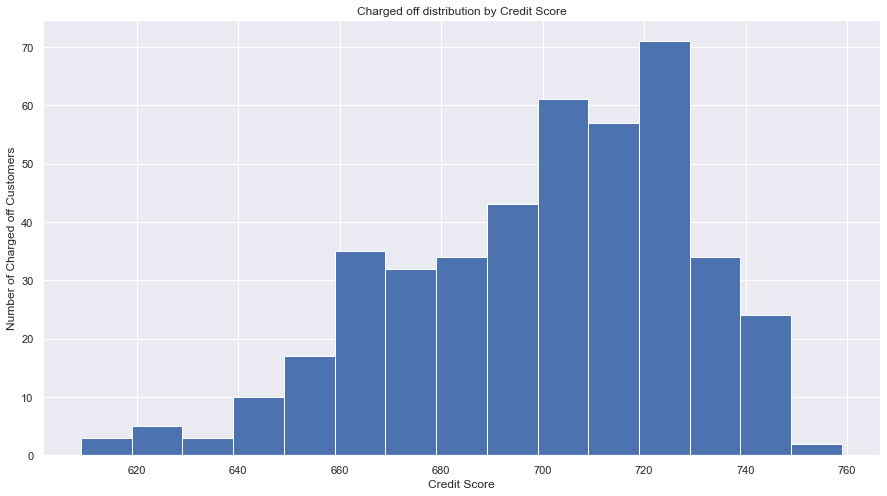

In [288]:

w=10

plt.pyplot.hist(df_charged_off["Credit_Score"], bins=np.arange(min(df_charged_off["Credit_Score"]), max(df_charged_off["Credit_Score"]) + w, w))
#plt.xticks(rotation =0)
plt.pyplot.ticklabel_format(style='plain')
plt.pyplot.title('Charged off distribution by Credit Score')
plt.pyplot.xlabel('Credit Score')
plt.pyplot.ylabel('Number of Charged off Customers')
plt.pyplot.show()

In [289]:
import plotly.express as px
fig = px.histogram(df_DecisionTree_Final, x="Credit_Score", title="Customers distribution by Credit Score", 
                   color="Loan Status Predicted",
                  color_discrete_sequence=['indianred','blue'])

fig.show()

In [290]:
##updating the legend names
newnames = {'1.0':'Fully paid', '0.0': 'Charged off'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )


In [291]:
import plotly.express as px
fig1 = px.histogram(df_Logistic_final, x="Credit_Score",
                   title="Charged off Customers distribution by Credit Score",
                   color="Loan Status Predicted",
                  color_discrete_sequence=['indianred','blue'])

fig1.show()

In [292]:
##updating the legend names
newnames = {'1.0':'Fully paid', '0.0': 'Charged off'}
fig1.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )


In [293]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_dec, y_train_dec)

KNeighborsClassifier(n_neighbors=6)

In [294]:
prediction_knn = knn.predict(X_test_dec)
 

In [295]:
X_test_dec

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
20998,176198.0,1,731.0,1141254.0,4,2,2,4013.37,16.5,6.0,0.0,149834.0,198264.0,0.0,0.0
71534,436766.0,0,719.0,843467.0,9,1,2,10121.49,10.2,13.0,0.0,57988.0,627572.0,0.0,0.0
31444,444136.0,0,628.0,1582244.0,3,2,2,15941.00,19.5,15.0,0.0,349847.0,461912.0,0.0,0.0
44448,111144.0,1,690.0,1516466.0,9,3,15,13142.68,29.9,9.0,0.0,186618.0,275638.0,0.0,0.0
51025,258104.0,1,729.0,2229156.0,6,1,2,10476.98,20.7,6.0,0.0,299744.0,438768.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19487,452848.0,0,682.0,1452664.0,10,3,2,5677.39,17.0,5.0,2.0,328757.0,491810.0,0.0,2.0
19907,326678.0,0,725.0,1410617.0,6,1,2,32091.38,18.0,15.0,0.0,466754.0,779878.0,0.0,0.0
41781,688930.0,1,747.0,9080784.0,6,3,2,103672.36,17.5,19.0,0.0,1057559.0,2148300.0,0.0,0.0
17546,274560.0,0,678.0,1035082.0,4,1,2,22167.87,15.4,7.0,0.0,199538.0,265870.0,0.0,0.0


In [296]:
y_test_dec.shape

(25499,)

In [297]:
prediction_knn.shape

(25499,)

In [298]:
prediction_knn_df = pd.DataFrame(prediction_knn)
y_train_dec_df = pd.DataFrame(y_test_dec)
# prediction_knn = prediction_knn.reshape(-1,1)
# y_test_dec = y_test_dec.reshape(-1,1)
prediction_knn_df.shape
#y_train_dec_df.shape

(25499, 1)

In [299]:
score_knn = skl.metrics.accuracy_score(y_test_dec,prediction_knn_df)
score_knn


0.6410839640770226